In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans

(277, 182, 3)


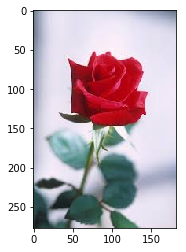

In [5]:
im = cv2.imread('flower1.jfif')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
print(im.shape)

plt.figure()
plt.imshow(im)

In [6]:
k=4
kmean = KMeans(k)

In [7]:
reshaped_im = im.reshape((-1,3))
reshaped_im.shape

(50414, 3)

In [8]:
kmean.fit(reshaped_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
dominant_colors = kmean.cluster_centers_.astype('uint8')
dominant_colors

array([[155, 166, 178],
       [168,  17,  35],
       [229, 224, 238],
       [ 57,  83,  78]], dtype=uint8)

In [10]:
print(np.zeros_like(reshaped_im).shape)
print('-'*20)
print(np.zeros(reshaped_im.shape).shape)

(50414, 3)
--------------------
(50414, 3)


In [11]:
kmean.labels_

array([3, 0, 0, ..., 2, 2, 2])

In [12]:
np.unique(kmean.labels_, return_counts=True)

(array([0, 1, 2, 3]), array([27399,  7948,  8029,  7038], dtype=int64))

(277, 182, 3)


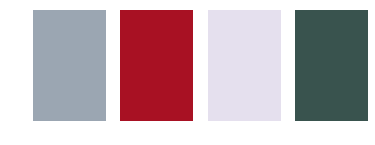

In [13]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)

In [14]:
reshaped_im.shape

(50414, 3)

In [15]:
new_img = np.zeros_like(reshaped_im, dtype='uint8')
print(new_img.shape)

(50414, 3)


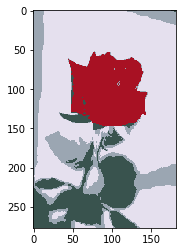

In [16]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmean.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()